In [3]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [4]:
data = pd.read_excel('TrainingSheet.xlsx')
data.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [5]:
print("Shape of train data", data.shape)

Shape of train data (1196, 15)


In [6]:
data.isnull().sum()

id                                    0
name                                  0
display_name                          0
production_year                       0
movie_sequel                          0
creative_type                         0
source                                0
production_method                     0
genre                                 0
language                              0
board_rating_reason                   0
movie_board_rating_display_name       0
movie_release_pattern_display_name    0
total                                 0
Category                              0
dtype: int64

In [8]:
data.describe(include='all')

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
count,1.196000e+03,1196,1196,1196.000000,1196.000000,1196,1196,1196,1196,1196,1196,1196,1196,1196.000000,1196.000000
unique,NaN,1196,1195,NaN,NaN,9,16,6,13,16,1003,6,7,NaN,NaN
top,NaN,My Soul to Take,Death at a Funeral,NaN,NaN,Contemporary Fiction,Original Screenplay,Live Action,Drama,English,International - to be excluded,R,Wide,NaN,NaN
freq,NaN,1,2,NaN,NaN,638,629,1093,321,1144,83,448,795,NaN,NaN
mean,8.928203e+07,NaN,NaN,2008.984950,0.097826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.703177,3.564381
std,4.832893e+07,NaN,NaN,1.383625,0.297204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.927715,1.962417
min,7.011500e+04,NaN,NaN,2007.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,4.808012e+07,NaN,NaN,2008.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,2.000000
50%,9.391012e+07,NaN,NaN,2009.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.500000,3.000000
75%,1.354326e+08,NaN,NaN,2010.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.250000,5.000000


In [11]:
#drop irrelevant features

def cleanDataSet(df):
    file= df.drop([
                   'id', 'name','display_name','board_rating_reason'
                  ], axis = 1)
    return file

data= cleanDataSet(data)


In [13]:
data.dtypes

production_year                        int64
movie_sequel                           int64
creative_type                         object
source                                object
production_method                     object
genre                                 object
language                              object
movie_board_rating_display_name       object
movie_release_pattern_display_name    object
total                                  int64
Category                               int64
dtype: object

In [14]:
for column in data.select_dtypes(include=[np.object]).columns:
    data[column]=data[column].astype('category', categories=data[column].unique())
    
data.dtypes    

In [17]:
df = pd.get_dummies(data=data, columns= ['creative_type',
                              'source',
                              'movie_sequel',
                              'production_method',
                              'genre',
                              'language',
                              'movie_board_rating_display_name',
                              'movie_release_pattern_display_name'])

In [18]:
df.head(5)

,production_year,total,Category,creative_type_Science Fiction,creative_type_Fantasy,creative_type_Kids Fiction,creative_type_Super Hero,creative_type_Historical Fiction,creative_type_Contemporary Fiction,creative_type_Dramatization,...,movie_board_rating_display_name_R,movie_board_rating_display_name_Not Rated,movie_board_rating_display_name_NC-17,movie_release_pattern_display_name_Wide,movie_release_pattern_display_name_Expands Wide,movie_release_pattern_display_name_Limited,movie_release_pattern_display_name_Exclusive,movie_release_pattern_display_name_IMAX,movie_release_pattern_display_name_Special Engagement,movie_release_pattern_display_name_Oscar Qualifying Run
0,2009,2784,9,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2011,1328,9,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2011,1124,9,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2010,1064,9,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2011,1044,9,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
df["Category"].value_counts(dropna= False )

2    247
3    245
4    206
1    168
5    132
6     80
7     61
8     38
9     19
Name: Category, dtype: int64

In [21]:
ind_features = df.drop("Category", axis=1)
dep_feature = df["Category"]
X= ind_features
y= dep_feature

In [23]:
import matplotlib.pyplot as plt
a = np.hstack(df['Category'])            
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

In [26]:
#SMOTE methodology to balance the imbalance class will help us to learn the data better and reduce bias
#SMOTE is used special plt.show()
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
!pip install imblearn

ModuleNotFoundError: No module named 'imblearn'

In [24]:
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_sample(X, Y)
plot_2d_space(X_sm, Y_sm, 'SMOTE over-sampling')
X = X_sm
Y = Y_sm

ModuleNotFoundError: No module named 'imblearn'

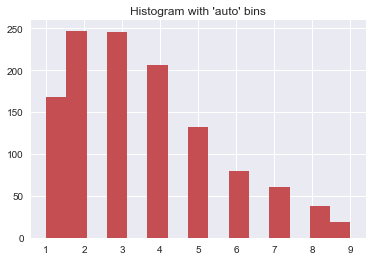

In [27]:
import matplotlib.pyplot as plt
a = np.hstack(df['Category'])            
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [31]:
def featureScale(feature,df):
    df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1] = sc_X.fit_transform(df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1])
    return df;

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=ind_features.as_matrix().astype(np.float)
X= scaler.fit_transform(X)
y=dep_feature.values

In [33]:
print("Shape of features X:",X.shape)
print("Shape of target label y:",y.shape)
print("Unique values present in target label:",np.unique(y))

Shape of features X: (1196, 77)
Shape of target label y: (1196,)
Unique values present in target label: [1 2 3 4 5 6 7 8 9]


In [19]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.metrics import average_precision_score

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
model_name=['Linear SVC','naive_bayes','RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier']
models_list= [LinearSVC(),NB(),RF(),KNN(),GB()]
for i, j in zip(model_name, models_list):
    scores = cross_val_score(j, X, y, cv=5)
    print(i+"--"+ "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Linear SVC--Accuracy: 0.44 (+/- 0.10)
naive_bayes--Accuracy: 0.12 (+/- 0.07)
RandomForestClassifier--Accuracy: 0.68 (+/- 0.36)
KNeighborsClassifier--Accuracy: 0.30 (+/- 0.05)
GradientBoostingClassifier--Accuracy: 0.81 (+/- 0.46)


In [22]:
from sklearn.model_selection import KFold

In [23]:
kf=KFold(n_splits=5)
model_name=['Linear SVC','naive_bayes','RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier']
models_list= [LinearSVC(),NB(),RF(),KNN(),GB()]
for i, j in zip(model_name, models_list):
    scores = cross_val_score(j, X, y, cv=kf)
    print(i+"--"+ "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Linear SVC--Accuracy: 0.15 (+/- 0.17)
naive_bayes--Accuracy: 0.20 (+/- 0.24)
RandomForestClassifier--Accuracy: 0.42 (+/- 0.40)
KNeighborsClassifier--Accuracy: 0.11 (+/- 0.11)
GradientBoostingClassifier--Accuracy: 0.63 (+/- 0.66)


In [24]:
from sklearn.model_selection import StratifiedKFold

In [25]:
skf = StratifiedKFold(n_splits=5)
model_name=['Linear SVC','naive_bayes','RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier']
models_list= [LinearSVC(),NB(),RF(),KNN(),GB()]
for i, j in zip(model_name, models_list):
    scores = cross_val_score(j, X, y, cv=skf)
    print(scores)
    print(i+"--"+ "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print()

[ 0.49382716  0.48547718  0.42677824  0.43881857  0.33474576]
Linear SVC--Accuracy: 0.44 (+/- 0.11)

[ 0.07407407  0.08713693  0.12552301  0.13080169  0.16525424]
naive_bayes--Accuracy: 0.12 (+/- 0.07)

[ 0.49382716  0.82572614  0.76569038  0.77637131  0.40677966]
RandomForestClassifier--Accuracy: 0.65 (+/- 0.34)

[ 0.32510288  0.32780083  0.28451883  0.26582278  0.27966102]
KNeighborsClassifier--Accuracy: 0.30 (+/- 0.05)

[ 0.5308642   1.          1.          1.          0.52118644]
GradientBoostingClassifier--Accuracy: 0.81 (+/- 0.46)



In [26]:
test= pd.read_excel("Scoringsheet.xlsx")
test.head()

,id,name,display_name,production_budget,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,7970115,"Avengers, The (2011)",Marvel's The Avengers,225000000,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for intense sequences of sci-fi violence and a...,PG-13,Wide
1,174540115,Dark Knight Rises The,The Dark Knight Rises,0,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,"for intense sequences of violence and action, ...",PG-13,Wide
2,149080115,Bond 23,Skyfall,200000000,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,English,"for intense violent sequences throughout, some...",PG-13,Wide
3,136020115,Twilight Saga Breaking Dawn Part 2 The,"The Twilight Saga: Breaking Dawn, Part 2",136200000,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,English,for sequences of violence including disturbing...,PG-13,Wide
4,53500115,"Hobbit, The",The Hobbit: An Unexpected Journey,270000000,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for extended sequences of intense fantasy acti...,PG-13,Wide


In [27]:
print("Shape of scoring data is:",test.shape)

Shape of scoring data is: (91, 14)


In [28]:
# Drop the columns, which are not present in training data
to_drop= ["id","name","display_name","board_rating_reason"]
test= test.drop(to_drop, axis=1)

In [29]:
test.head(5)

,production_budget,production_year,movie_sequel,creative_type,source,production_method,genre,language,movie_board_rating_display_name,movie_release_pattern_display_name
0,225000000,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,PG-13,Wide
1,0,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,PG-13,Wide
2,200000000,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,English,PG-13,Wide
3,136200000,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,English,PG-13,Wide
4,270000000,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,PG-13,Wide


In [30]:
for column in test.select_dtypes(include=[np.object]).columns:
    test[column] = test[column].astype('category', categories = test[column].unique())

In [31]:
test.dtypes

production_budget                        int64
production_year                          int64
movie_sequel                             int64
creative_type                         category
source                                category
production_method                     category
genre                                 category
language                              category
movie_board_rating_display_name       category
movie_release_pattern_display_name    category
dtype: object

In [32]:
nominal_columns=["movie_sequel","creative_type","source","production_method","genre",
                 "language","movie_board_rating_display_name","movie_release_pattern_display_name"]
test= pd.get_dummies(data=test, columns=nominal_columns)
test.shape

(91, 50)

In [33]:
X.shape

(1196, 77)

In [48]:
X_ScoringData=test

In [52]:
X_ScoringData.columns

Index(['production_budget', 'production_year', 'movie_sequel_0',
       'movie_sequel_1', 'creative_type_Super Hero',
       'creative_type_Contemporary Fiction', 'creative_type_Fantasy',
       'creative_type_Kids Fiction', 'creative_type_Historical Fiction',
       'creative_type_Science Fiction', 'creative_type_Factual',
       'creative_type_Dramatization', 'source_Based on Comic/Graphic Novel',
       'source_Based on Fiction Book/Short Story',
       'source_Original Screenplay', 'source_Based on Factual Book/Article',
       'source_Based on Folk Tale/Legend/Fairytale', 'source_Based on Game',
       'source_Based on Real Life Events', 'source_Remake',
       'source_Based on Play', 'source_Based on TV',
       'production_method_Live Action',
       'production_method_Animation/Live Action',
       'production_method_Digital Animation', 'genre_Adventure',
       'genre_Action', 'genre_Drama', 'genre_Comedy',
       'genre_Thriller/Suspense', 'genre_Romantic Comedy', 'genre_Horr

In [56]:
df.columns

Index(['production_year', 'total', 'Category', 'movie_sequel_0',
       'movie_sequel_1', 'creative_type_Science Fiction',
       'creative_type_Fantasy', 'creative_type_Kids Fiction',
       'creative_type_Super Hero', 'creative_type_Historical Fiction',
       'creative_type_Contemporary Fiction', 'creative_type_Dramatization',
       'creative_type_Factual', 'creative_type_Multiple Creative Types',
       'source_Original Screenplay',
       'source_Based on Fiction Book/Short Story', 'source_Based on TV',
       'source_Based on Theme Park Ride',
       'source_Based on Comic/Graphic Novel',
       'source_Based on Factual Book/Article',
       'source_Based on Musical or Opera',
       'source_Based on Folk Tale/Legend/Fairytale', 'source_Spin-Off',
       'source_Remake', 'source_Based on Game', 'source_Based on Toy',
       'source_Based on Real Life Events', 'source_Based on Short Film',
       'source_Based on Play', 'source_Compilation',
       'production_method_Animation/Li

In [58]:
feature_difference = set(df.columns) - set(X_ScoringData.columns)
feature_difference_df = None
if(len(list(feature_difference))>0):
    feature_difference_df = pd.DataFrame(data=np.zeros((X_ScoringData.shape[0], len(feature_difference))),
                                     columns=list(feature_difference))
    '''
    
for c in feature_difference:
    X_ScoringData[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
    X_ScoringData = X_ScoringData[X.columns]'''

In [71]:
df.columns

Index(['production_year', 'movie_sequel_0', 'movie_sequel_1',
       'creative_type_Super Hero', 'creative_type_Contemporary Fiction',
       'creative_type_Fantasy', 'creative_type_Kids Fiction',
       'creative_type_Historical Fiction', 'creative_type_Science Fiction',
       'creative_type_Factual', 'creative_type_Dramatization',
       'source_Based on Comic/Graphic Novel',
       'source_Based on Fiction Book/Short Story',
       'source_Original Screenplay', 'source_Based on Factual Book/Article',
       'source_Based on Folk Tale/Legend/Fairytale', 'source_Based on Game',
       'source_Based on Real Life Events', 'source_Remake',
       'source_Based on Play', 'source_Based on TV',
       'production_method_Live Action',
       'production_method_Animation/Live Action',
       'production_method_Digital Animation', 'genre_Adventure',
       'genre_Action', 'genre_Drama', 'genre_Comedy',
       'genre_Thriller/Suspense', 'genre_Romantic Comedy', 'genre_Horror',
       'genre_Do

In [70]:
X_ScoringData.columns

Index(['production_budget', 'production_year', 'movie_sequel_0',
       'movie_sequel_1', 'creative_type_Super Hero',
       'creative_type_Contemporary Fiction', 'creative_type_Fantasy',
       'creative_type_Kids Fiction', 'creative_type_Historical Fiction',
       'creative_type_Science Fiction', 'creative_type_Factual',
       'creative_type_Dramatization', 'source_Based on Comic/Graphic Novel',
       'source_Based on Fiction Book/Short Story',
       'source_Original Screenplay', 'source_Based on Factual Book/Article',
       'source_Based on Folk Tale/Legend/Fairytale', 'source_Based on Game',
       'source_Based on Real Life Events', 'source_Remake',
       'source_Based on Play', 'source_Based on TV',
       'production_method_Live Action',
       'production_method_Animation/Live Action',
       'production_method_Digital Animation', 'genre_Adventure',
       'genre_Action', 'genre_Drama', 'genre_Comedy',
       'genre_Thriller/Suspense', 'genre_Romantic Comedy', 'genre_Horr

In [67]:
for column in X_ScoringData:
    if(column not in df.columns):
        df= X_ScoringData.drop([column],axis=1)

In [72]:
print("Shape of training data X:",df.shape)
print("Shape of Scoring data X_scoringData:",X_ScoringData.shape)

Shape of training data X: (91, 49)
Shape of Scoring data X_scoringData: (91, 50)
